<a href="https://colab.research.google.com/github/maddy9491/Project/blob/main/Image_Classification_using_CNN_%5Bproject%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pathlib
import numpy as np

#Created a list of class_names from the subdirectory
data_dir = pathlib.Path("/content/drive/MyDrive/Train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
class_names = class_names[:] 
print(class_names)

data_dir = pathlib.Path("/content/drive/MyDrive/Test")
class_names_test = np.array(sorted([item.name for item in data_dir.glob("*")])) 
class_names_test = class_names_test[:] 
print(class_names_test)

['Carambola' 'Pear' 'Plum' 'Pomengaranate' 'Tomatoes']
['Carambola' 'Pear' 'Plum' 'Pomengaranate' 'Tomatoes']


In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

#Function which shows random image from 5 directories for better visualization of how the data looks
def view_random_image(target_dir):
  i = random.randrange(4)
  target_folder = target_dir + class_names[i]
  print(target_folder)

  image = random.sample(os.listdir(target_folder), 1)
  print(image)

  img = mpimg.imread(target_folder + "/" + image[0])
  plt.imshow(img)
  plt.title(class_names[i])
  plt.axis("off"); 

  print("Image shape: ",img.shape) #show the shape of image

/content/drive/MyDrive/Train/Pear
['Pear 421.png']
Image shape:  (258, 320, 3)


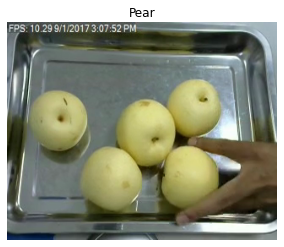

In [52]:
#Visualizing the data
view_random_image("/content/drive/MyDrive/Train/")

drive/MyDrive/Test/Pear
['Pear 364.png']
Image shape:  (258, 320, 3)


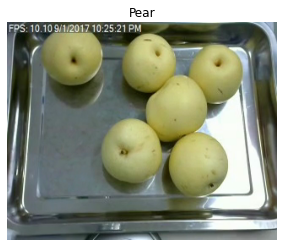

In [53]:
view_random_image("drive/MyDrive/Test/")

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_dir = "/content/drive/MyDrive/Train"
test_dir = "/content/drive/MyDrive/Test"

In [62]:
# Rescaling and augmenting the data
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Loading data from directories and turning them into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224))
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224))

Found 9728 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [63]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation = "softmax")                      
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [64]:
history_1 = model.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/3
304/304 [==============================] - 2015s 7s/step - loss: 0.2833 - accuracy: 0.9049 - val_loss: 0.1177 - val_accuracy: 0.9610
Epoch 2/3
304/304 [==============================] - 182s 599ms/step - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 3/3
304/304 [==============================] - 181s 597ms/step - loss: 0.0639 - accuracy: 0.9805 - val_loss: 0.0624 - val_accuracy: 0.9795


In [65]:
model.evaluate(test_data)

63/63 [==============================] - 14s 219ms/step - loss: 0.0624 - accuracy: 0.9795


[0.06239134445786476, 0.9794999957084656]